In [16]:
import tbsim as mtb
import starsim as ss
import sciris as sc
import numpy as np
import matplotlib.pyplot as plt
import shared_functions as sf


In [17]:

def build_tbhiv_sim(include_intv=False, include_cnn=False, hiv_pars=None, intv_pars=None, Demgs=False) -> ss.Sim:
    """Construct a TB-HIV simulation with optional interventions."""
    
    sim_pars = dict(
        dt=ss.days(7),   # Simulation's Time unit and time-step size.
        start=ss.date('1980-01-01'),  stop=ss.date('2030-12-31'), # Simulation's start and stop dates
        verbose=0,          # Verbosity level   
    )

    people = ss.People(n_agents=100)
    network = ss.RandomNet(pars=dict(n_contacts=ss.poisson(lam=2), dur=0))

    tb = sf.make_tb()
    hiv = sf.make_hiv(hiv_pars=hiv_pars)
    
    # Please note, this multiplier is used to adjust the rate of progression 
    # from latent to presynptomatic TB (TB state 'rr_activation'):
    cnn_pars = dict(
                acute_multiplier     = 1.7,
                latent_multiplier    = 2.5,
                aids_multiplier      = 2.9,
                )
    connector = sf.make_tb_hiv_connector(pars=cnn_pars) if include_cnn else None
    interventions = sf.make_hiv_interventions(include=include_intv, pars=intv_pars) if include_intv else None
    
    return ss.Sim(
        people=people,
        diseases=[tb, hiv],
        networks=network,
        interventions=interventions,
        connectors=connector,
        pars=sim_pars,
    )


In [18]:


def get_scenarios():
    """Define simulation scenarios."""
    return {
        "No HIV": dict(
            include_intv=False,
            include_cnn=False,
            hiv_pars=dict(
                hiv_prev=ss.bernoulli(p=0.00),
                init_onart=ss.bernoulli(p=0.00)
        )),
        "Initial HIV prevalence = 15%": dict(
            include_intv=False, 
            include_cnn=True,
            hiv_pars=dict(
                hiv_prev=ss.bernoulli(p=0.15),
                init_onart=ss.bernoulli(p=0.77)
        )),
        "Controlled HIV Prevalence 30%": dict(
            include_intv=True,
            include_cnn=True,
            intv_pars=dict(
                prevalence=0.30,
                percent_on_ART=0.30,
                start=ss.date('1981-05-01'),
                stop=ss.date('2030-12-31'),
                dt=ss.days(7),
                
            )
        ),
    }


In [19]:

def main():
    scenarios = get_scenarios()
    results = {}

    for name, kwargs in scenarios.items():
        print(f"\nRunning scenario: {name}")
        sim = build_tbhiv_sim(**kwargs)
        sim.run()
        results[name] = sim.results.flatten()
    return results



In [20]:
sim = main()


Running scenario: No HIV

Running scenario: Initial HIV prevalence = 15%

Running scenario: Controlled HIV Prevalence 30%
HIV intervention present, skipping initialization.


/Users/mine/git/tbdeven/tbsim/comorbidities/hiv/intervention.py:112: RuntimeWarning: 
Not enough acute cases to revert. Expected: 1, Available: 0
  ss.warn(msg=f"Not enough acute cases to revert. Expected: {-delta}, Available: {len(acute_uids)}")
/Users/mine/git/tbdeven/tbsim/comorbidities/hiv/intervention.py:112: RuntimeWarning: 
Not enough acute cases to revert. Expected: 2, Available: 0
  ss.warn(msg=f"Not enough acute cases to revert. Expected: {-delta}, Available: {len(acute_uids)}")


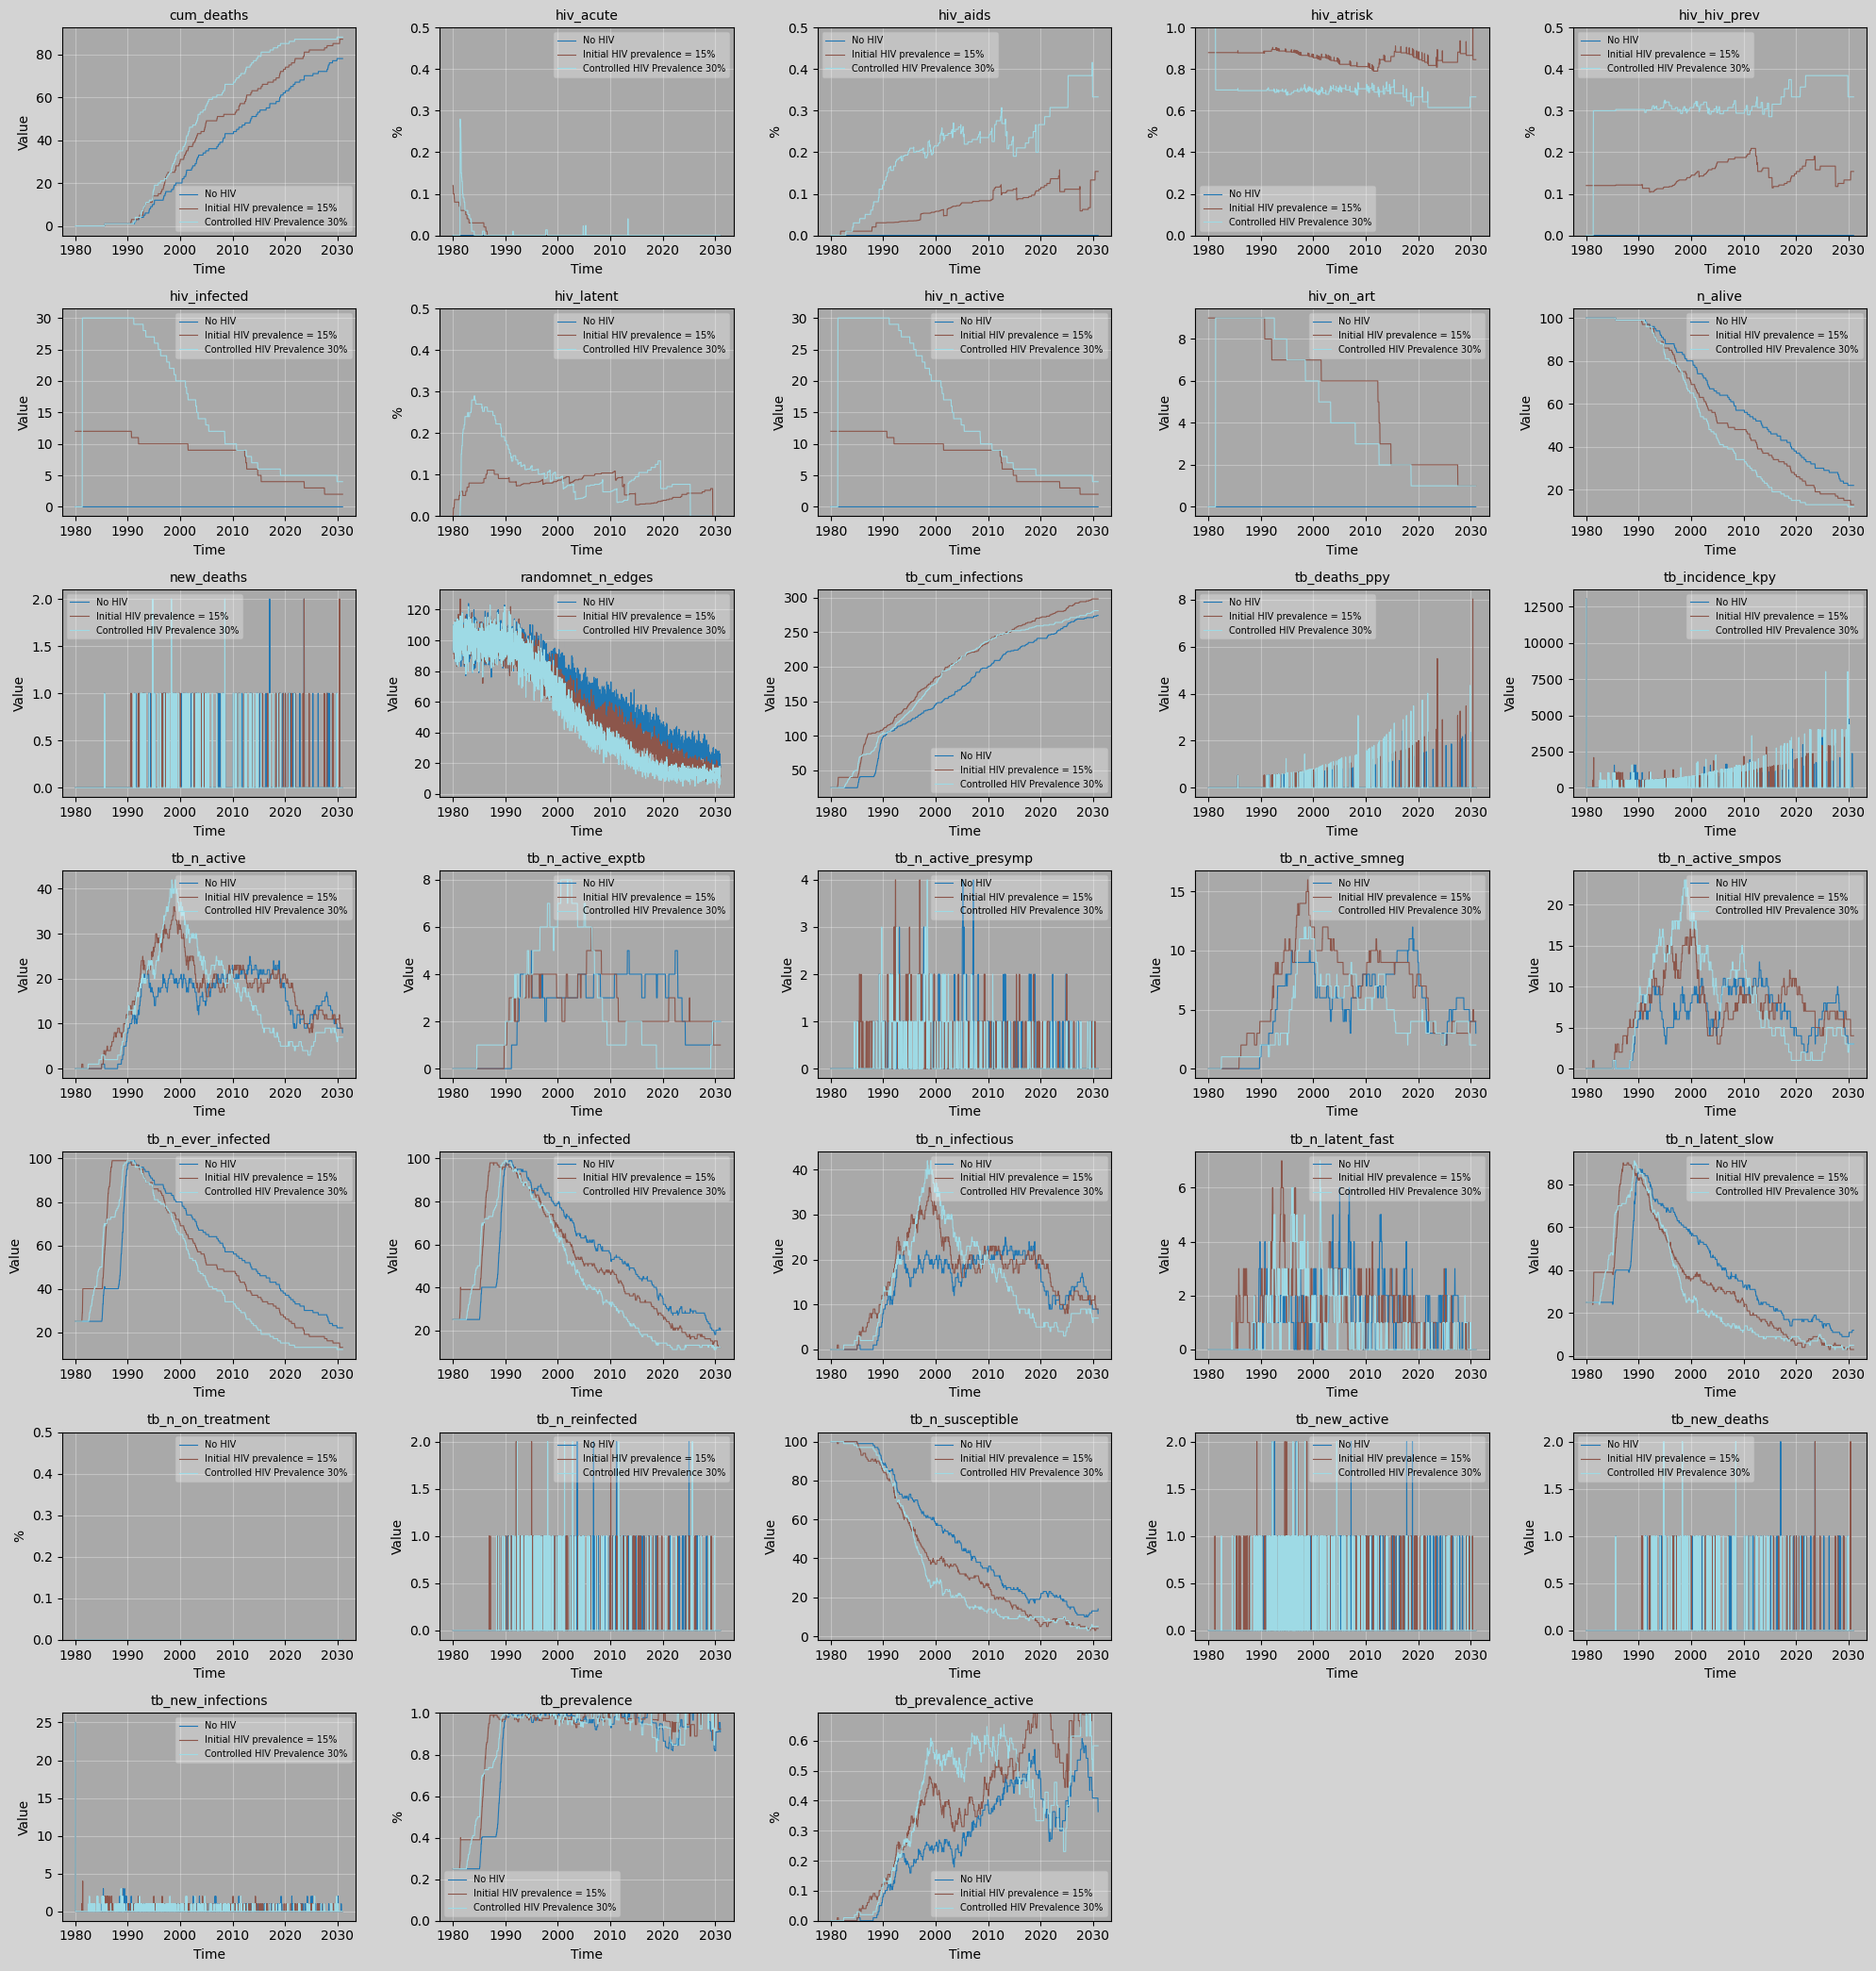

In [21]:
sf.plot_results(sim, heightfold=3)

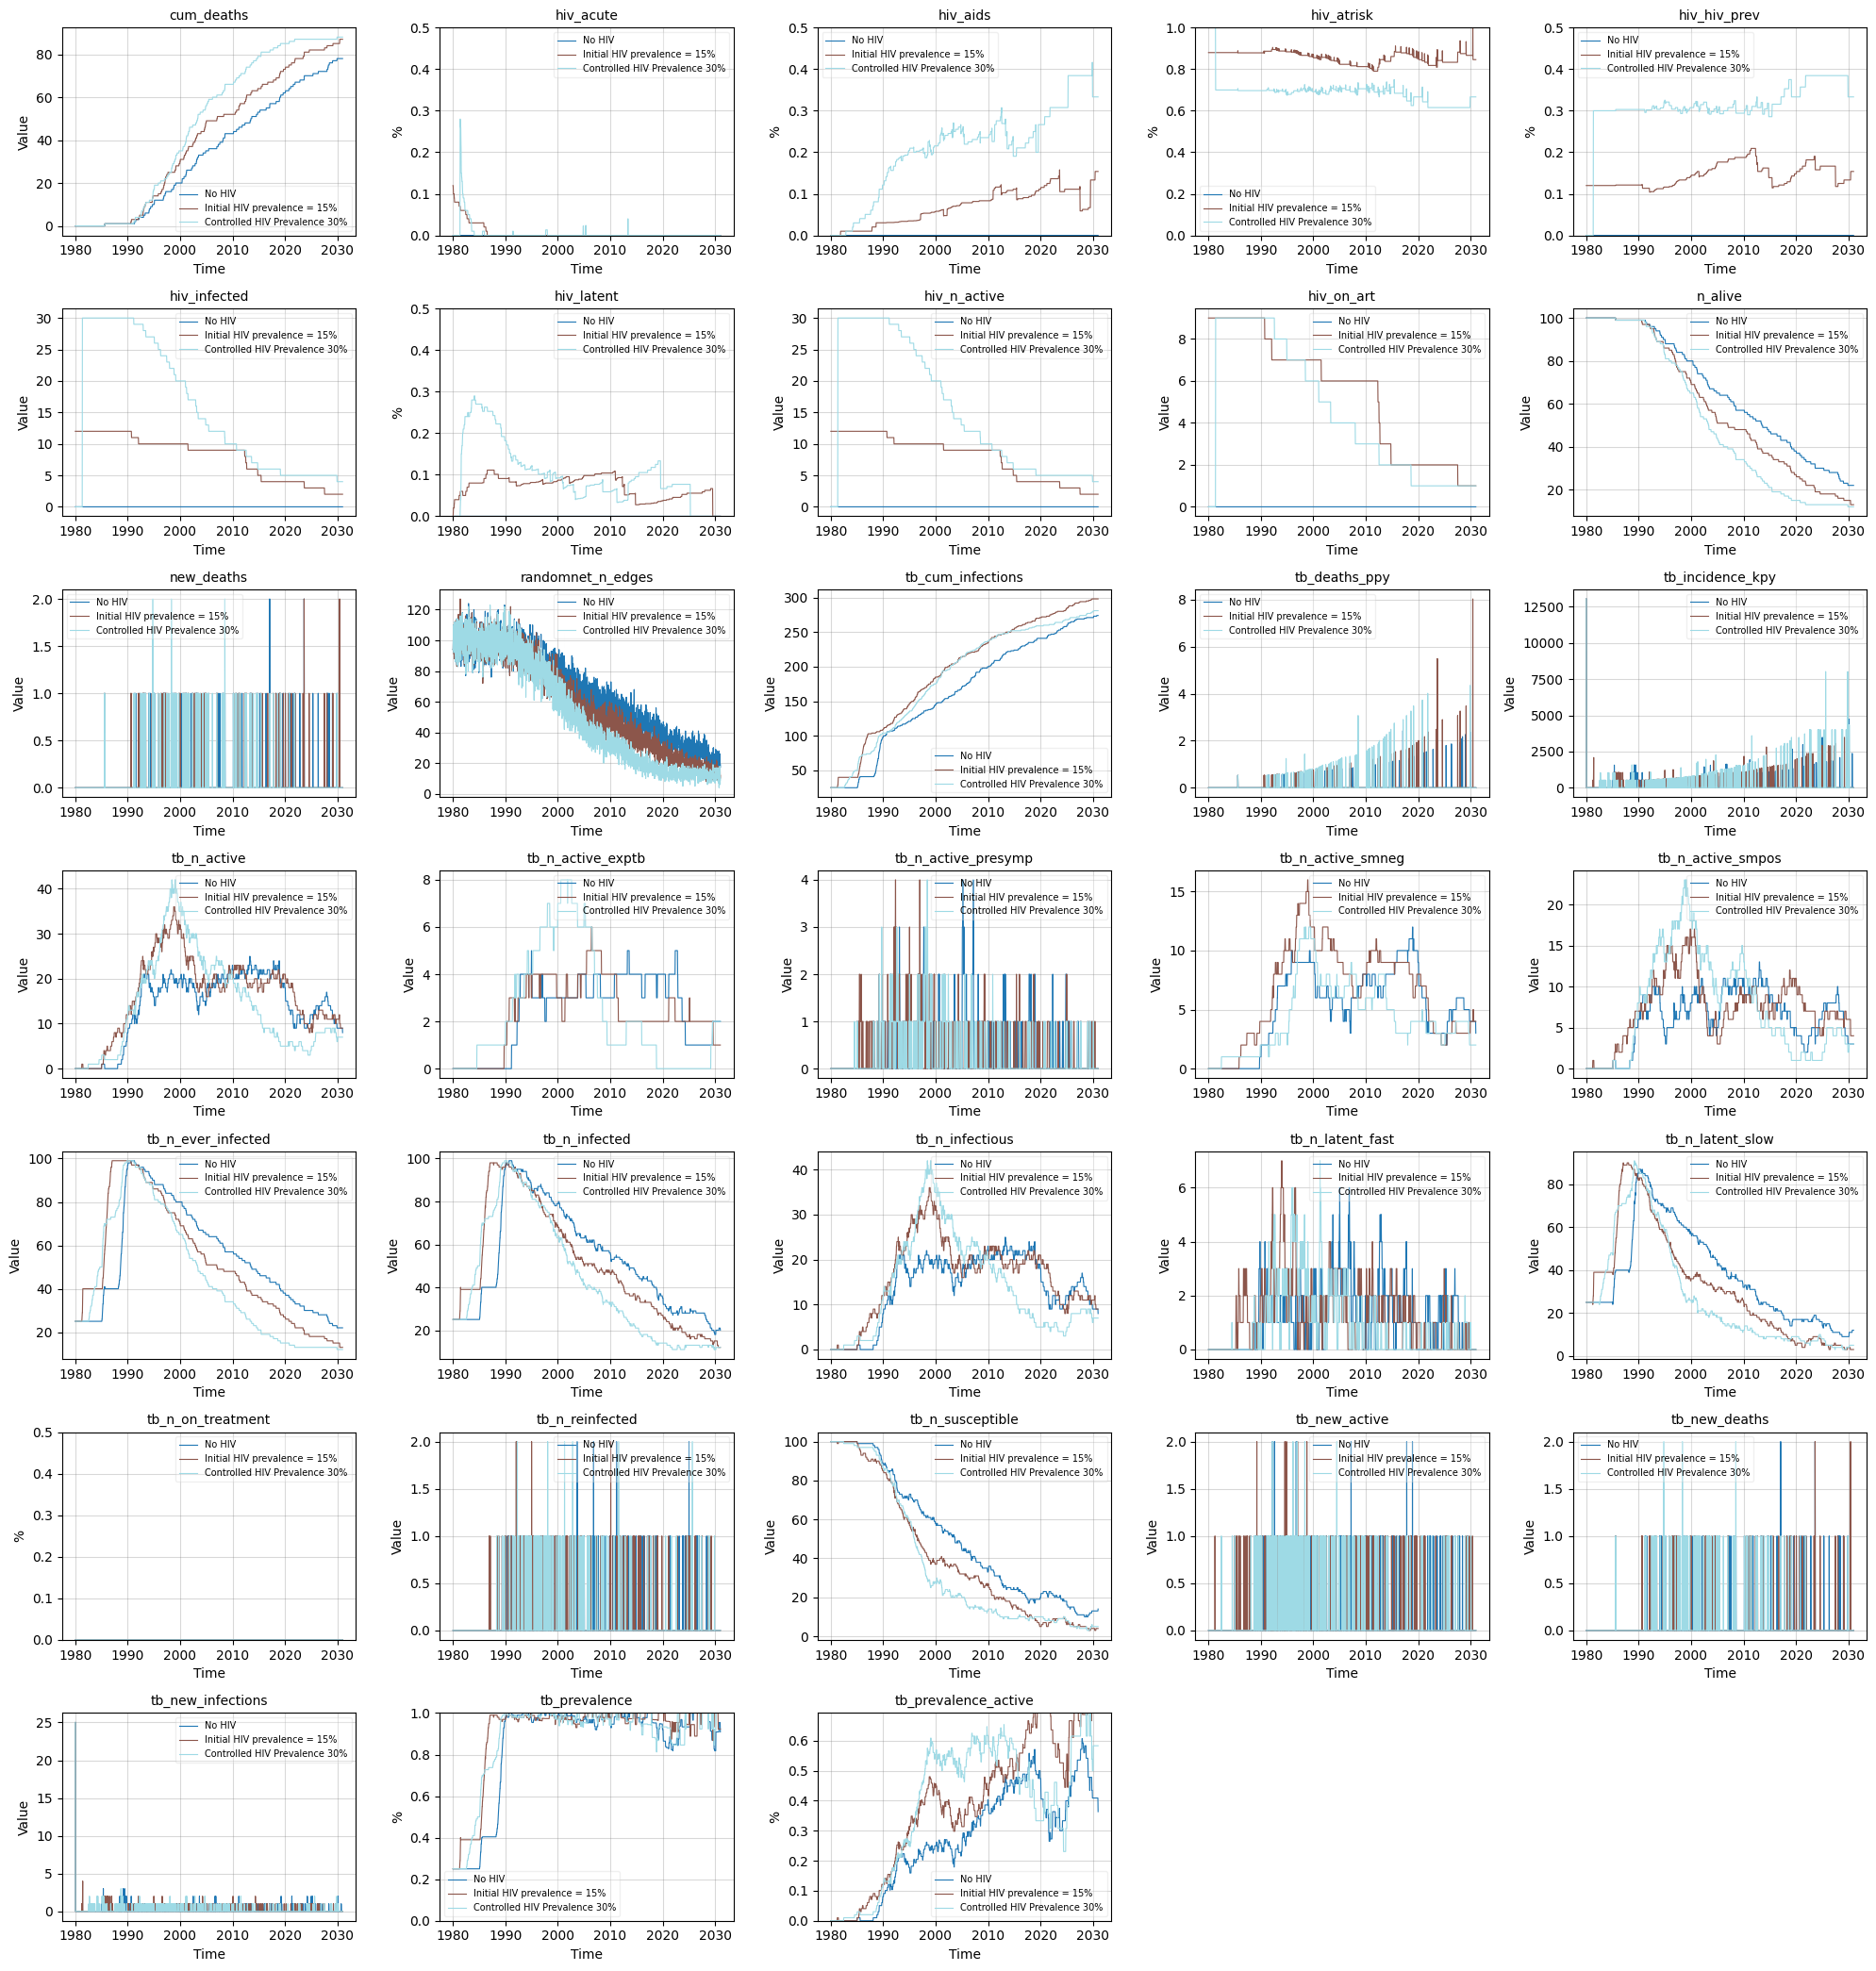

In [22]:
sf.plot_results(sim, dark=False, heightfold=3)